Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']

🔹 Baseline Performance:
R² Score: 0.8052747336256919
RMSE: 0.5051432839771741
Fitting 3 folds for each of 72 candidates, totalling 216 fits

 Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

🔹 Tuned Performance:
R² Score: 0.8137435597049512
RMSE: 0.49403654886842335


/tmp/ipython-input-2062013617.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')


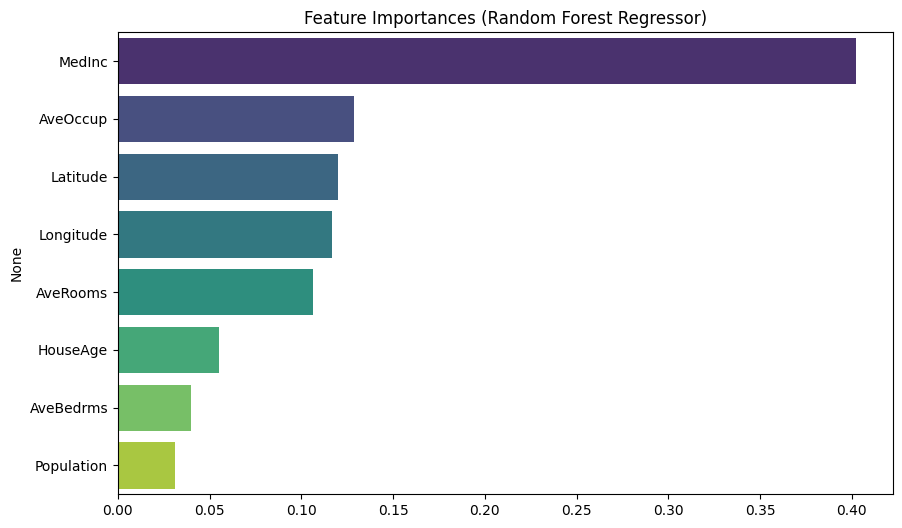

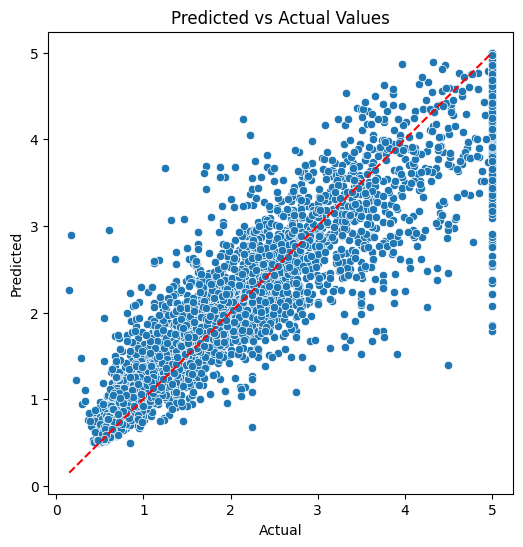

In [9]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

print("Features:", X.columns.tolist())
print("Target:", data.target_names)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing (optional scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build baseline Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Evaluate
y_pred = rf_reg.predict(X_test_scaled)
print("\n🔹 Baseline Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    rf_reg,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_
print("\n Best Parameters:", grid_search.best_params_)

#  Evaluate tuned model
y_pred_best = best_rf.predict(X_test_scaled)
print("\n🔹 Tuned Performance:")
print("R² Score:", r2_score(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

#  Feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title("Feature Importances (Random Forest Regressor)")
plt.show()

# Visualization – Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


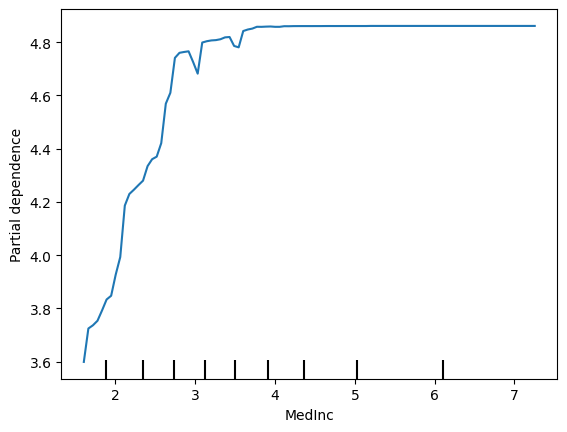

In [10]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(rf_reg, X_test, features=['MedInc'])

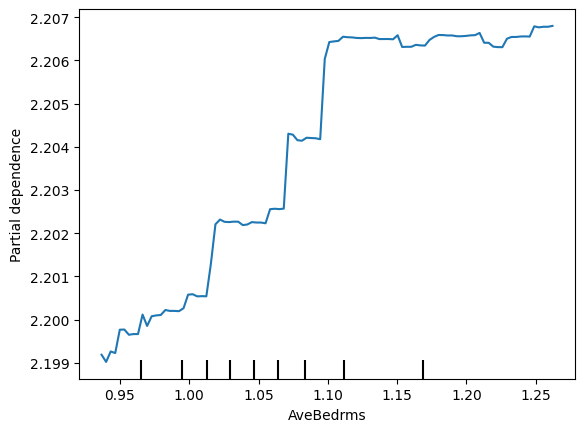

In [11]:
PartialDependenceDisplay.from_estimator(rf_reg, X_test, features=['AveBedrms'])


Top 3 features for PDP visualization:
['MedInc', 'AveOccup', 'Latitude']


<Figure size 1200x400 with 0 Axes>

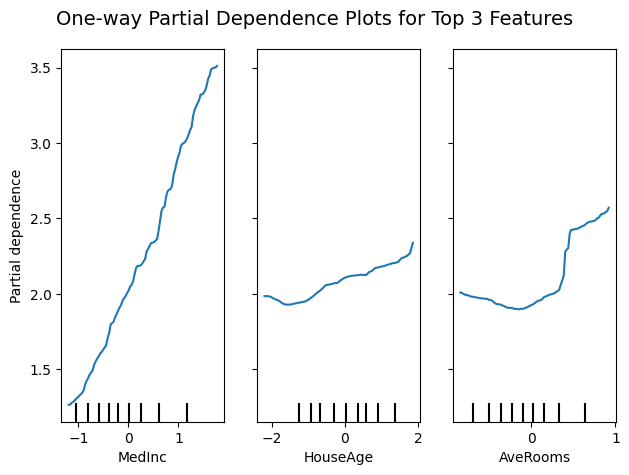

<Figure size 600x500 with 0 Axes>

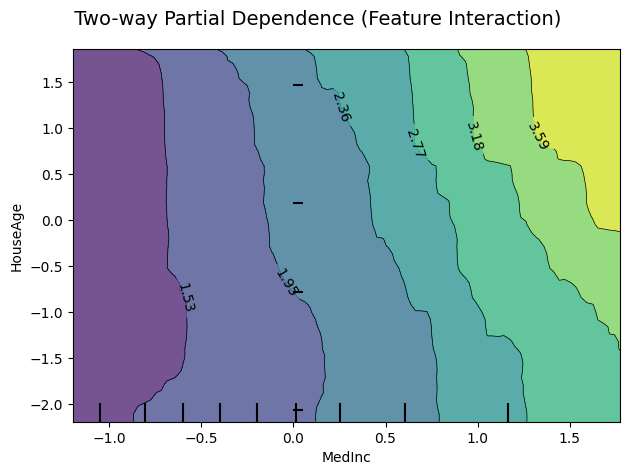

In [12]:
from sklearn.inspection import PartialDependenceDisplay

# Choose top important features from feature importances
top_features = X.columns[indices[:3]]  # top 3 for demonstration

print("\nTop 3 features for PDP visualization:")
print(top_features.tolist())

# One-way PDP (single feature)
plt.figure(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(
    best_rf,
    X_test_scaled,
    features=[0, 1, 2],  # indices of top 3 features
    feature_names=X.columns,
    kind="average"
)
plt.suptitle("One-way Partial Dependence Plots for Top 3 Features", fontsize=14)
plt.tight_layout()
plt.show()

# Two-way PDP (pairwise interaction)
# Example: top 2 most important features
plt.figure(figsize=(6, 5))
PartialDependenceDisplay.from_estimator(
    best_rf,
    X_test_scaled,
    features=[(0, 1)],  # a tuple => 2D PDP for interaction
    feature_names=X.columns,
    kind="average"
)
plt.suptitle(" Two-way Partial Dependence (Feature Interaction)", fontsize=14)
plt.tight_layout()
plt.show()

Shape of X: (569, 30)
Target classes: ['malignant' 'benign']

🔹 Baseline Model Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



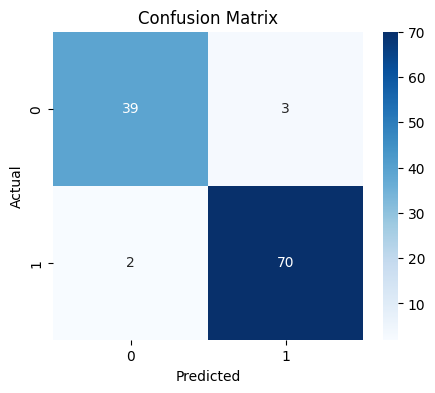

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Best Hyperparameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

🔹 Tuned Model Accuracy: 0.956140350877193

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/tmp/ipython-input-5460677.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


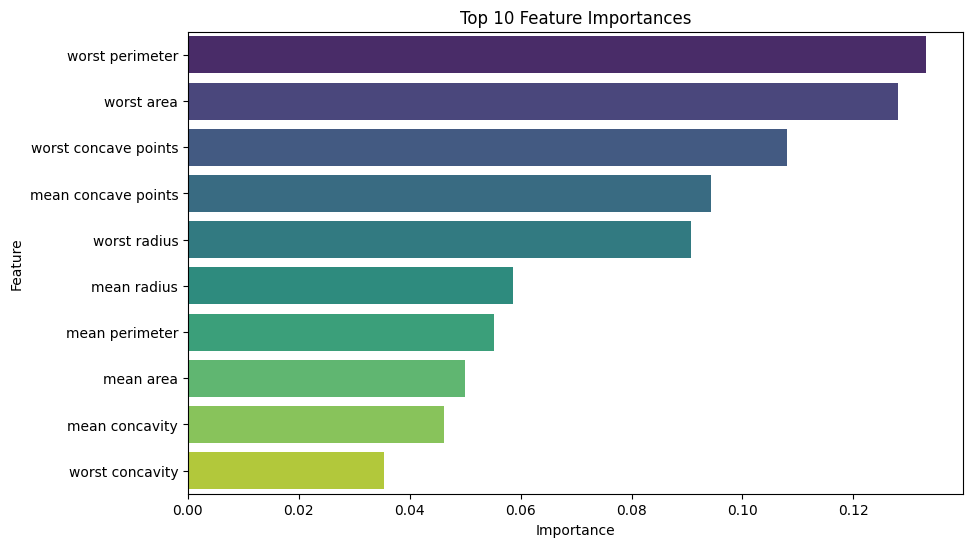


Top 5 Most Important Features:
1. worst perimeter (0.1331)
2. worst area (0.1281)
3. worst concave points (0.1081)
4. mean concave points (0.0944)
5. worst radius (0.0906)


In [14]:
#  Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns

#  Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape of X:", X.shape)
print("Target classes:", data.target_names)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Data preprocessing (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Build a baseline Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

#  Evaluate the baseline model
y_pred = rf.predict(X_test_scaled)
print("\n🔹 Baseline Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Hyperparameter Tuning with Grid Search
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="accuracy",
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)

print("\n Best Hyperparameters:")
print(grid_search.best_params_)

# Evaluate Tuned Model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
print("\n Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_best))

# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Top 10 Feature Importances")
sns.barplot(
    x=importances[indices][:10],
    y=X.columns[indices][:10],
    palette="viridis"
)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Optional: Model Interpretation Summary
print("\nTop 5 Most Important Features:")
for i in range(5):
    print(f"{i+1}. {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")




Top 3 features for PDP visualization:
['worst perimeter', 'worst area', 'worst concave points']


/tmp/ipython-input-4206509462.py:19: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x400 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


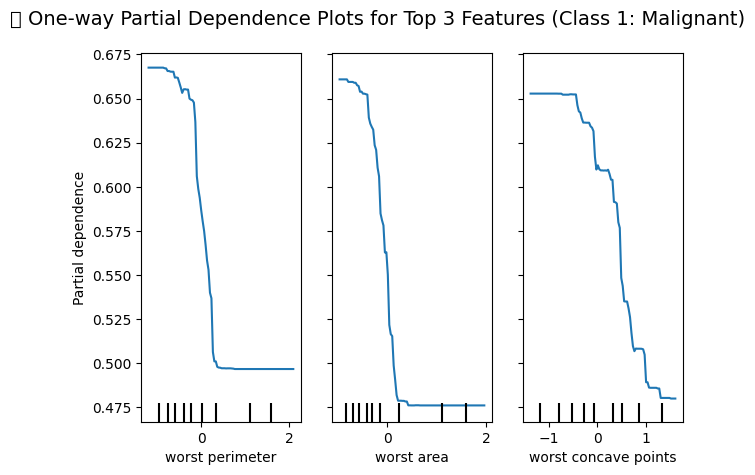

/tmp/ipython-input-4206509462.py:33: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 600x500 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


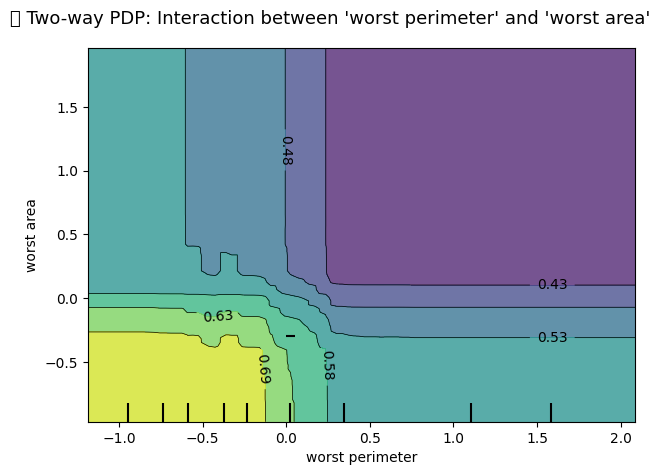

In [15]:
from sklearn.inspection import PartialDependenceDisplay

# Select top 3 most important features
top_features = X.columns[indices[:3]]
print("\nTop 3 features for PDP visualization:")
print(top_features.tolist())

# One-way PDP (Single Feature)
plt.figure(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(
    best_rf,
    X_test_scaled,
    features=[X.columns.get_loc(f) for f in top_features],  # convert to column indices
    feature_names=X.columns,
    target=1,  # Class 1 corresponds to "malignant"
    kind="average"
)
plt.suptitle("🔹 One-way Partial Dependence Plots for Top 3 Features (Class 1: Malignant)", fontsize=14)
plt.tight_layout()
plt.show()

#  Two-way PDP (Pairwise Interaction)
plt.figure(figsize=(6, 5))
PartialDependenceDisplay.from_estimator(
    best_rf,
    X_test_scaled,
    features=[(X.columns.get_loc(top_features[0]), X.columns.get_loc(top_features[1]))],
    feature_names=X.columns,
    target=1,
    kind="average"
)
plt.suptitle(f"🔹 Two-way PDP: Interaction between '{top_features[0]}' and '{top_features[1]}'", fontsize=13)
plt.tight_layout()
plt.show()